In [1]:
#1)
library(ISLR2)
#install.packages("caret")
#install.packages("tidyverse")

In [2]:
library(caret)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()


In [3]:
college <- data.frame(College)

In [4]:
dim(college)
head(college)

[1] 777  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
#1a)
set.seed(150)

In [6]:
split <- createDataPartition(college$Apps, p = 0.80, list = FALSE)

In [7]:
training <- college[split,]
testing <- college[-split,]

In [8]:
dim(training)
head(training)

[1] 624  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63


In [9]:
dim(testing)
head(testing)

[1] 153  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100


In [10]:
preObj <- preProcess(training, method = c('center', 'scale'))

In [11]:
training <- predict(preObj, training)
testing <- predict(preObj, testing)

In [12]:
dim(training)
head(training)
dim(testing)
head(testing)

[1] 624  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,-0.3719438,-0.3366915,-0.07207533,-0.2567024,-0.1848019,-0.1773057,-0.2073199,-0.7593606,-0.9646070,-0.6283248,1.2432435,-0.1670297,-0.1113151,1.0816682,-0.8980323,-0.53309969,-0.3227170
Adelphi University,Yes,-0.2248878,-0.0395000,-0.29312172,-0.6448215,-1.3364638,-0.2177603,0.2294528,0.4487585,1.8970337,1.2530617,0.2345941,-2.6414288,-3.3961514,-0.4572542,-0.5702335,0.17885547,-0.5570106
Adrian College,Yes,-0.4368050,-0.3946697,-0.47926604,-0.3121480,-0.2849464,-0.5476055,-0.4845757,0.1916587,-0.5558012,-0.9418892,-0.2481167,-1.1930001,-0.9325241,-0.2746702,0.5770626,-0.18712951,-0.6741574
Agnes Scott College,Yes,-0.7194544,-0.7159114,-0.68973605,1.7947843,1.6678716,-0.6529477,-0.5073638,0.6184942,0.9885763,-0.6283248,-0.6659857,1.1606967,1.1889326,-1.6310086,1.1507106,1.91258679,-0.3812904
Albertson College,Yes,-0.6719268,-0.6600806,-0.66752564,0.5749814,0.3159206,-0.6193023,-0.5212899,0.7532843,-0.9328110,-0.3147604,-0.9541712,-0.3480833,-0.4534855,-1.1875903,-0.9799820,0.01546932,-0.6155840
Albertus Magnus College,Yes,-0.7373472,-0.7197766,-0.72569574,-0.5893759,-0.5353077,-0.6717731,-0.4016521,0.7008660,1.2338598,-0.3147604,0.2345941,1.0399943,0.9151963,-0.6398383,0.2492637,-0.16139619,-0.1469967


[1] 153  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska Pacific University,Yes,-0.7820790,-0.8030933,-0.7764624,-0.6448215,-0.5853800,-0.7052183,0.002837359,-0.729407256,-0.21967198,1.5666261,0.2345941,0.1950775,-0.5219196,-0.53550453,-1.717529502,0.2595274,-2.9585205
Albion College,Yes,-0.3051256,-0.1271114,-0.3174474,0.5195358,0.6163542,-0.4358547,-0.526986918,0.845141332,0.42169893,-0.6283248,-0.7020089,0.9796431,1.3942349,-0.06600278,1.150710621,0.3749189,0.4387374
Albright College,Yes,-0.5458389,-0.5054723,-0.5945486,0.1314167,0.3659929,-0.5602225,-0.353543845,1.276220186,0.03469608,-1.5690180,-1.2063335,0.3761311,0.2992895,-0.69200511,0.003414572,0.4069834,0.8487513
Alderson-Broaddus College,Yes,-0.6733247,-0.6519207,-0.6527187,-0.3675936,-0.5853800,-0.5950696,-0.497868738,-0.003537361,-0.89193045,0.6886457,0.6668724,-1.9775657,-2.6433764,-0.63983825,-0.652183171,-0.1348459,-0.7913043
Alfred University,Yes,-0.3518145,-0.2538043,-0.3354272,0.5195358,0.9668600,-0.3885909,-0.477612613,1.514099832,0.94860422,-0.3147604,-1.0622408,0.5571847,0.5730258,-0.69200511,0.659012314,0.2615697,0.4387374
Amherst College,Yes,0.3666910,-0.4397638,-0.3925397,3.0700328,2.0183773,-0.4360549,-0.544078024,2.315851586,0.85230773,0.6886457,0.3758050,1.2210479,1.2573667,-1.44842459,3.281403283,2.4043791,2.0202195


In [13]:
y_train <- training$Apps
y_test <- testing$Apps
head(y_train,10)
head(y_test)

[1] -0.37194380 -0.22488781 -0.43680499 -0.71945443 -0.67192683 -0.73734717
 [7] -0.09460627 -0.50641895 -0.48181643 -0.69792722

[1] -0.7820790 -0.3051256 -0.5458389 -0.6733247 -0.3518145  0.3666910

In [14]:
one_hot_encoding <- dummyVars(Apps ~ ., data = training)
one_hot_encoding

Dummy Variable Object

Formula: Apps ~ .
18 variables, 1 factors
Variables and levels will be separated by '.'
A less than full rank encoding is used

In [15]:
x_train <- predict(one_hot_encoding, training)
x_test <- predict(one_hot_encoding, testing)

In [16]:
head(x_train)
head(x_test)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,0,1,-0.3366915,-0.07207533,-0.2567024,-0.1848019,-0.1773057,-0.2073199,-0.7593606,-0.9646070,-0.6283248,1.2432435,-0.1670297,-0.1113151,1.0816682,-0.8980323,-0.53309969,-0.3227170
Adelphi University,0,1,-0.0395000,-0.29312172,-0.6448215,-1.3364638,-0.2177603,0.2294528,0.4487585,1.8970337,1.2530617,0.2345941,-2.6414288,-3.3961514,-0.4572542,-0.5702335,0.17885547,-0.5570106
Adrian College,0,1,-0.3946697,-0.47926604,-0.3121480,-0.2849464,-0.5476055,-0.4845757,0.1916587,-0.5558012,-0.9418892,-0.2481167,-1.1930001,-0.9325241,-0.2746702,0.5770626,-0.18712951,-0.6741574
Agnes Scott College,0,1,-0.7159114,-0.68973605,1.7947843,1.6678716,-0.6529477,-0.5073638,0.6184942,0.9885763,-0.6283248,-0.6659857,1.1606967,1.1889326,-1.6310086,1.1507106,1.91258679,-0.3812904
Albertson College,0,1,-0.6600806,-0.66752564,0.5749814,0.3159206,-0.6193023,-0.5212899,0.7532843,-0.9328110,-0.3147604,-0.9541712,-0.3480833,-0.4534855,-1.1875903,-0.9799820,0.01546932,-0.6155840
Albertus Magnus College,0,1,-0.7197766,-0.72569574,-0.5893759,-0.5353077,-0.6717731,-0.4016521,0.7008660,1.2338598,-0.3147604,0.2345941,1.0399943,0.9151963,-0.6398383,0.2492637,-0.16139619,-0.1469967


,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Alaska Pacific University,0,1,-0.8030933,-0.7764624,-0.6448215,-0.5853800,-0.7052183,0.002837359,-0.729407256,-0.21967198,1.5666261,0.2345941,0.1950775,-0.5219196,-0.53550453,-1.717529502,0.2595274,-2.9585205
Albion College,0,1,-0.1271114,-0.3174474,0.5195358,0.6163542,-0.4358547,-0.526986918,0.845141332,0.42169893,-0.6283248,-0.7020089,0.9796431,1.3942349,-0.06600278,1.150710621,0.3749189,0.4387374
Albright College,0,1,-0.5054723,-0.5945486,0.1314167,0.3659929,-0.5602225,-0.353543845,1.276220186,0.03469608,-1.5690180,-1.2063335,0.3761311,0.2992895,-0.69200511,0.003414572,0.4069834,0.8487513
Alderson-Broaddus College,0,1,-0.6519207,-0.6527187,-0.3675936,-0.5853800,-0.5950696,-0.497868738,-0.003537361,-0.89193045,0.6886457,0.6668724,-1.9775657,-2.6433764,-0.63983825,-0.652183171,-0.1348459,-0.7913043
Alfred University,0,1,-0.2538043,-0.3354272,0.5195358,0.9668600,-0.3885909,-0.477612613,1.514099832,0.94860422,-0.3147604,-1.0622408,0.5571847,0.5730258,-0.69200511,0.659012314,0.2615697,0.4387374
Amherst College,0,1,-0.4397638,-0.3925397,3.0700328,2.0183773,-0.4360549,-0.544078024,2.315851586,0.85230773,0.6886457,0.3758050,1.2210479,1.2573667,-1.44842459,3.281403283,2.4043791,2.0202195


In [17]:
linear <- lm(Apps ~ ., data = training)

In [18]:
pred <- predict(linear, testing)

In [19]:
(lin_info <- postResample(pred, testing$Apps))

RMSE  Rsquared       MAE 
0.4028947 0.9319650 0.1805774

In [20]:
#1b) Fit a ridge regression model on the training set, with λ chosen by crossvalidation. Report the test error obtained.
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/_3/nbf8r53d0f19nygyl0lz56p40000gn/T//RtmpFmfFhu/downloaded_packages


In [21]:
ridge_fit <- train(x = x_train, y = y_train,
                   method = 'glmnet', 
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 0,
                                          lambda = seq(0, 10e2, length.out = 20)))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [22]:
(ridge_info <- postResample(predict(ridge_fit, x_test), y_test))


RMSE  Rsquared       MAE 
0.5650812 0.8757608 0.2138779

In [23]:
coef(ridge_fit$finalModel, ridge_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.046005573
Private.No   0.097697074
Private.Yes -0.098948653
Accept       0.487898570
Enroll       0.176964057
Top10perc    0.123976538
Top25perc   -0.010483059
F.Undergrad  0.160459713
P.Undergrad  0.007472502
Outstate    -0.002985068
Room.Board   0.060344444
Books       -0.006453713
Personal    -0.002030226
PhD         -0.017548838
Terminal    -0.020730833
S.F.Ratio    0.009278258
perc.alumni -0.042180830
Expend       0.139312717
Grad.Rate    0.054596200

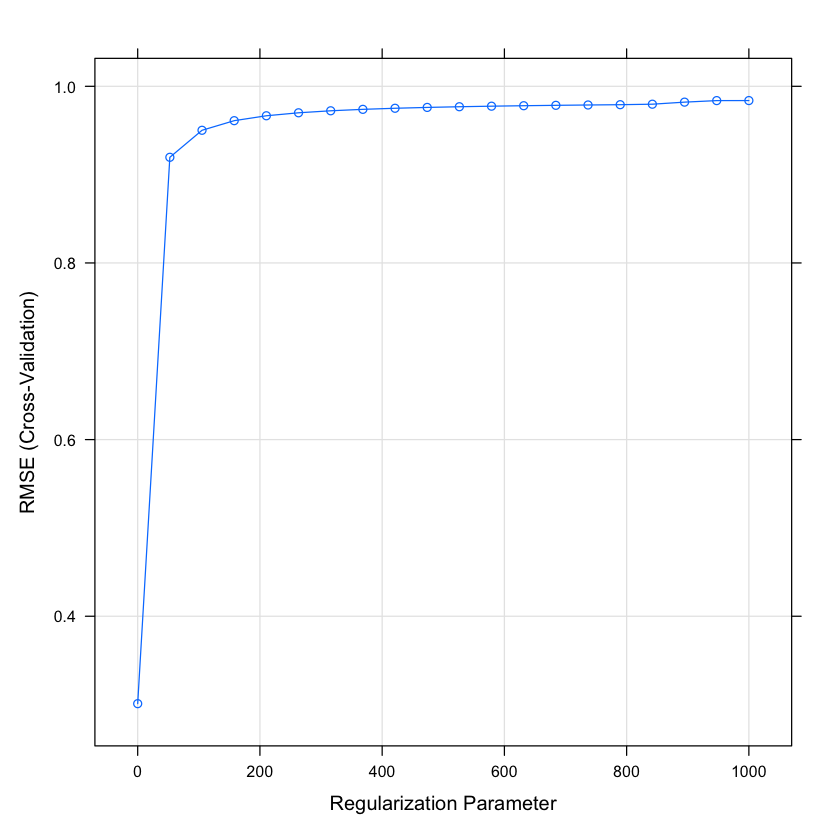

In [24]:
plot(ridge_fit)

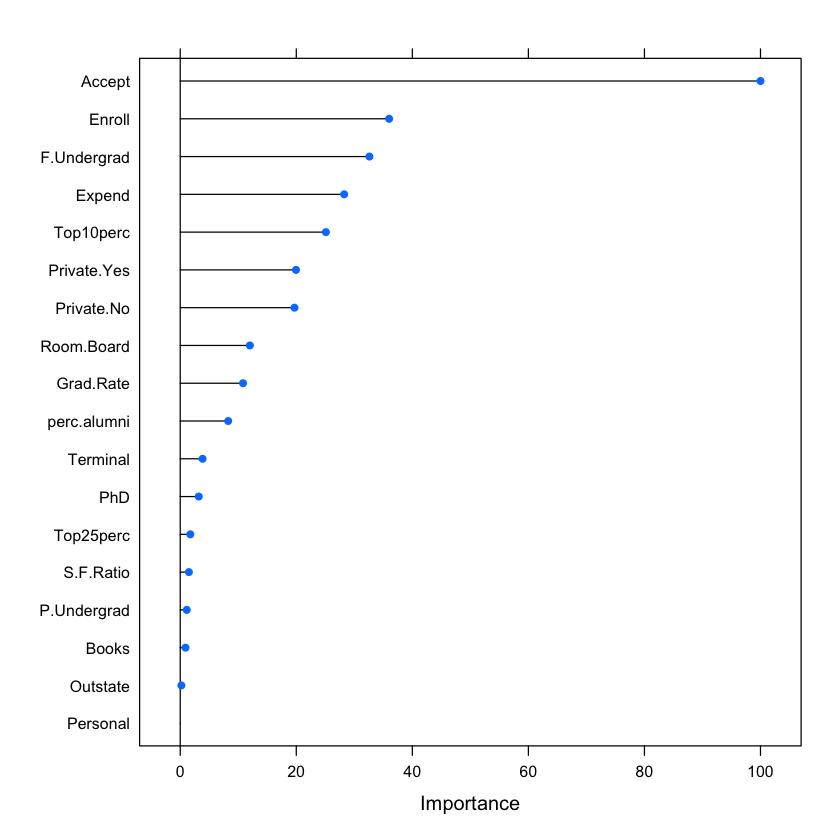

In [25]:
plot(varImp(ridge_fit))

In [26]:
#1d) Fit a lasso model on the training set, with λ chosen by cross-validation.Report the test error obtained, along with the number of non-zero coefficient estimates
lasso_fit <- train(x = x_train, y = y_train, 
                   method = 'glmnet',
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 1,
                                          lambda = seq(0.0001, 1, length.out = 50)))


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [27]:
(lasso_info <- postResample(predict(lasso_fit, x_test), y_test))

RMSE  Rsquared       MAE 
0.4065043 0.9310496 0.1799253

In [28]:
coef(lasso_fit$finalModel, lasso_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) -0.044387922
Private.No   0.164869423
Private.Yes  .          
Accept       0.785572931
Enroll      -0.045311207
Top10perc    0.226282851
Top25perc   -0.080824851
F.Undergrad  0.121682833
P.Undergrad  0.009177170
Outstate    -0.063317593
Room.Board   0.053831768
Books       -0.009221606
Personal     0.001319891
PhD         -0.035614622
Terminal    -0.022192633
S.F.Ratio    0.019178626
perc.alumni -0.020141380
Expend       0.149987968
Grad.Rate    0.044427513

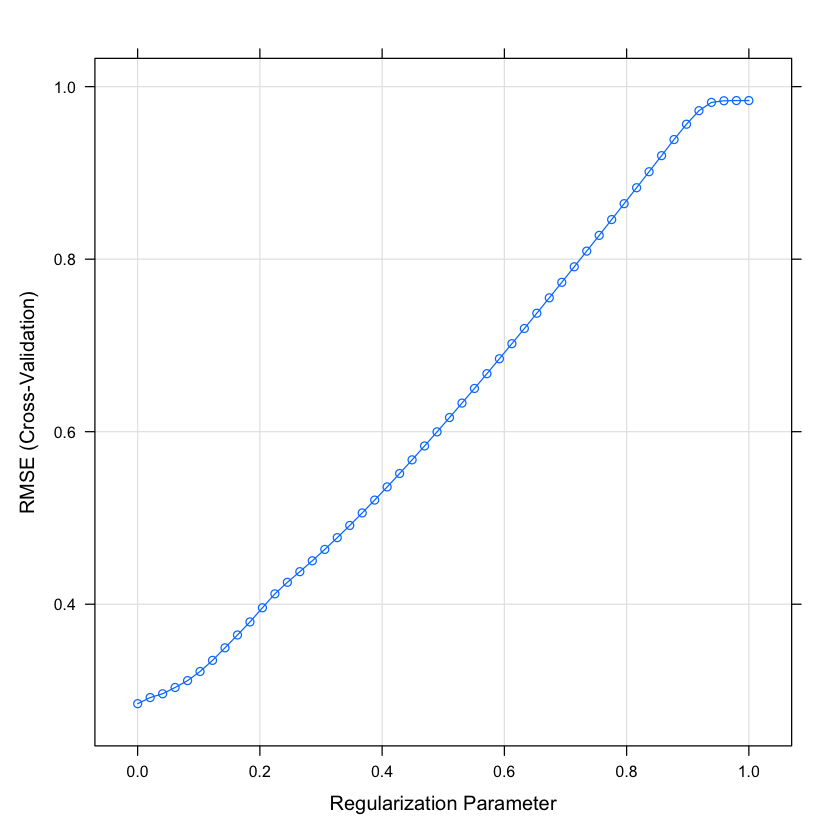

In [29]:
plot(lasso_fit)

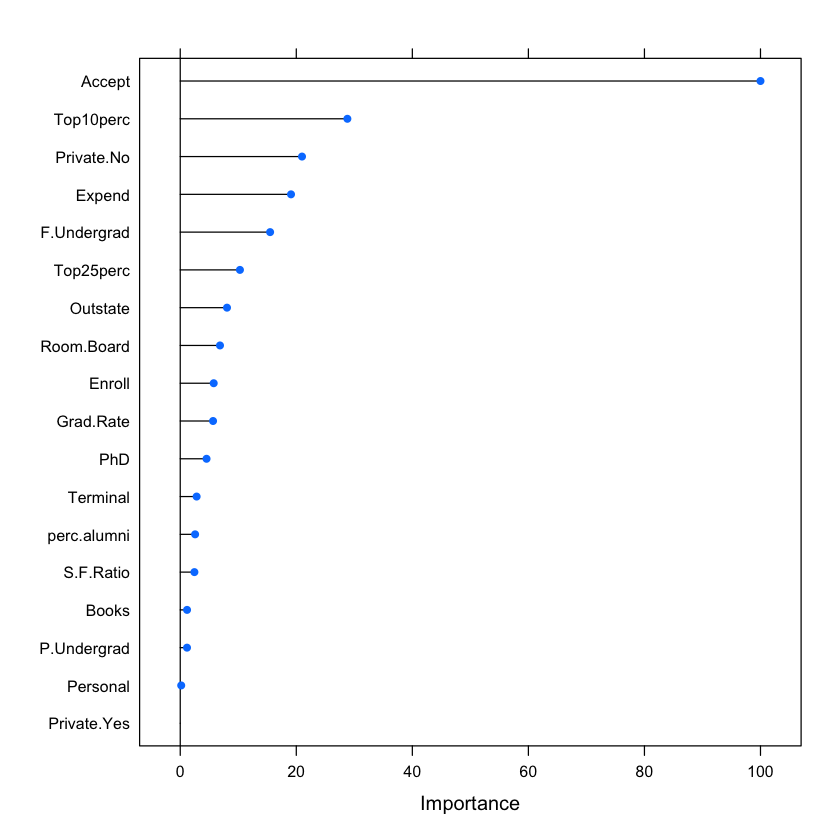

In [30]:
plot(varImp(lasso_fit))

In [31]:
#1g) Comment more generally on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these three approaches?
as_tibble(rbind(lin_info,
      ridge_info,
      lasso_info)) %>%
    mutate(model = c('Linear', 'Ridge', 'Lasso')) %>%
    select(model, RMSE, Rsquared)

model,RMSE,Rsquared
<chr>,<dbl>,<dbl>
Linear,0.4028947,0.9319650
Ridge,0.5650812,0.8757608
Lasso,0.4065043,0.9310496


In [32]:
testing %>%
    summarize(sd = sd(Apps))

sd
<dbl>
1.370421


The ridge regression model performed slightly better than the other two models. The RMSE > 21 and Rsqaured > 94 for linear and lasso regression models, but if observed the RMSE value of Ridge regression model is slightly lesser than the other two models and Rsquared is slightly higher than linear and lasso models. When we compare the RMSE scores with the mean and standard deviation of the response variable we see that the models all have phenomenal accuracy! 

In [33]:
#2) The insurance company benchmark data set gives information on customers. Specifically, it contains 86 variables on product-usage data and socio-demographic data derived from zip area codes. There are 5,822 customers in the training set and another 4,000 in the test set. The data were collected to answer the following questions: Can you predict who will be interested in buying a caravan insurance policy and give an explanation why? Compute the OLS estimates and compare them with those obtained from the following variable-selection algorithms: Forwards Selection, Backwards Selection, Lasso regression, and Ridge regression. What methods performed the best in the prediction?
rm(list = ls())
#install.packages('stargazer')

In [34]:
#install.packages('leaps')
library(leaps)

In [35]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4



In [36]:
library(caret)

In [37]:
training_set  <- data.frame(read.table('ticdata2000.txt')) #Training data 
x_testing_set <- data.frame(read.table('ticeval2000.txt')) #Testing data
y_testing_set <- data.frame(read.table('tictgts2000.txt')) #For Evalutaion
# str(training_set)

In [38]:
x_training_set = training_set[, -86] #without response
y_training_set = training_set[, "V86"] #only response

In [39]:
dim(training_set)
dim(x_testing_set)
dim(x_training_set)

[1] 5822   86

[1] 4000   85

[1] 5822   85

In [40]:
# checking if there are missing values (NAs)
colSums(is.na(training_set))
colSums(is.na(x_testing_set))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 V86 
  0   0   0   0   0   0

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 
  0   0   0   0   0

From the description of the dataset it is given that, attribute 86, "CARAVAN:Number of mobile home policies", is the target variable. i.e V86 is the target variable

In [41]:
table(training_set$V86) #number of 0s and 1s


   0    1 
5474  348 

In [42]:
linear_fit <- lm(V86 ~ ., data = training_set)
summary(linear_fit)


Call:
lm(formula = V86 ~ ., data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67293 -0.08720 -0.04593 -0.00639  1.04628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7685381  0.4298406   1.788 0.073835 .  
V1           0.0035209  0.0022512   1.564 0.117866    
V2          -0.0072642  0.0076739  -0.947 0.343875    
V3          -0.0012739  0.0071737  -0.178 0.859055    
V4           0.0107473  0.0049596   2.167 0.030279 *  
V5          -0.0154869  0.0101044  -1.533 0.125405    
V6          -0.0056016  0.0056016  -1.000 0.317353    
V7          -0.0002069  0.0060664  -0.034 0.972795    
V8           0.0003569  0.0054592   0.065 0.947874    
V9          -0.0030237  0.0058038  -0.521 0.602399    
V10          0.0086829  0.0075479   1.150 0.250036    
V11          0.0020367  0.0072008   0.283 0.777310    
V12          0.0055682  0.0076295   0.730 0.465526    
V13         -0.0038250  0.0065474  -0.584 0.559107    
V14   

In [43]:
#predictiing training and testing samples

linear_train_pred = predict(linear_fit, x_training_set)
linear_test_pred  = predict(linear_fit, x_testing_set)
head(linear_train_pred)
head(linear_test_pred)

1          2          3          4          5          6 
0.09738541 0.01345938 0.08354523 0.09075754 0.04307400 0.01475749

1           2           3           4           5           6 
0.014441132 0.215946829 0.099937482 0.095439888 0.005945841 0.027520016

In [44]:
#since we are classifying lets convert values above 0.5 to 1 and below or equal to 0.5 to 0

linear_train_pred = ifelse(linear_train_pred > 0.5, 1, 0)
linear_test_pred  = ifelse(linear_test_pred > 0.5, 1, 0)

In [45]:
#calculating training and testing error

train_error <- postResample(linear_train_pred, training_set[, 86])
test_error  <- postResample(linear_test_pred, y_testing_set[, 1])
train_error
test_error

RMSE    Rsquared         MAE 
0.244134208 0.003378766 0.059601512

RMSE    Rsquared         MAE 
0.244438131 0.001005736 0.059750000

In [46]:
#combining testing data

names(y_testing_set) <- "V86"
testing_set <- cbind(x_testing_set, y_testing_set)
head(testing_set)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,4,2,8,0,6,0,3,5,⋯,0,0,0,1,0,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,⋯,0,0,0,1,0,0,0,0,0,1
3,39,1,3,3,9,1,4,2,3,5,⋯,0,0,0,1,0,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,1,0,0,0,0,0,0
6,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,2,0,0,0,0,0,0


In [47]:
#Forward Selection

In [48]:
regfit_forward  <- regsubsets(V86~., nbest = 1, data = training_set, method = "forward",  nvmax = 85)
regfit_backward <- regsubsets(V86~., nbest = 1, data = training_set, method = "backward", nvmax = 85)

In [49]:
forward_summary <- summary(regfit_forward)
backward_summary<- summary(regfit_backward)

In [50]:
names(forward_summary)
names(backward_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

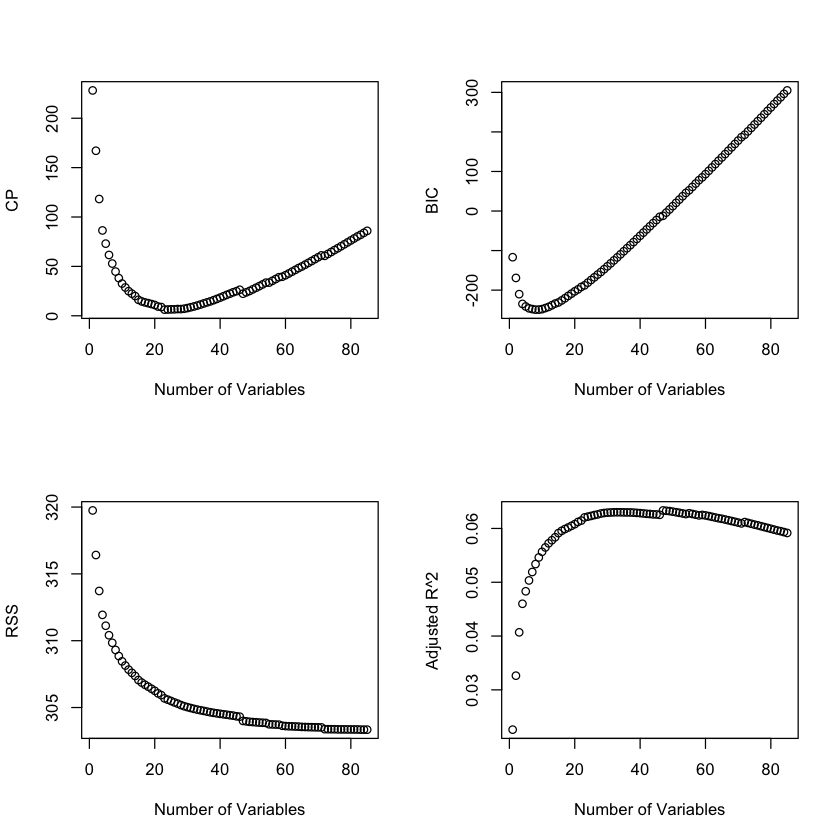

In [51]:
# plotting model selection measures of forward selection

par(mfrow = c(2,2))
plot(forward_summary$cp, xlab = "Number of Variables", ylab = "CP") #Mallows CP
plot(forward_summary$bic, xlab = "Number of Variables", ylab = "BIC") #Bayes Information Criterion
plot(forward_summary$rss, xlab = "Number of Variables", ylab = "RSS") #Residual Sum of Squares
plot(forward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2") #Adjusted R Squared

In [52]:
# Examining the best 'p' variable models using forward selection 

forward_summary$outmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
1 ( 1 ),,,,,,,,,,,⋯,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
8 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
10 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,*,,*


In [53]:
#Identifying the optimal models using model selection measures

print("Calculating the number of variables of best performing subset according to certain model selection measures")
which(forward_summary$cp == min(forward_summary$cp))
which(forward_summary$bic == min(forward_summary$bic)) 
which(forward_summary$rss == min(forward_summary$rss)) 
which(forward_summary$adjr2 == max(forward_summary$adjr2)) 

[1] "Calculating the number of variables of best performing subset according to certain model selection measures"


[1] 23

[1] 8

[1] 85

[1] 47

In [54]:
forward_summary$outmat[23, ] #best 23 variable subset (selected via forward selection)

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
" " " " " " "*" " " " " "*" " " " " "*" " " " " " " " " " " "*" " " "*" " " " " 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
"*" " " " " " " " " " " " " " " " " " " " " " " " " " " "*" "*" " " " " " " " " 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
"*" "*" "*" "*" " " "*" "*" " " " " " " " " " " " " " " " " " " "*" "*" "*" " " 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "*" "*" "*" 
V81 V82 V83 V84 V85 
" " "*" "*" " " "*"

In [55]:
coef(regfit_forward, 23) #OLS estimates for the best 23 variable subset (selected via forward selection)

(Intercept)           V4           V7          V10          V16          V18 
 0.601138905  0.009609302  0.003566035  0.005089834  0.004894039 -0.005563832 
         V21          V35          V36          V41          V42          V43 
-0.008559661 -0.074829917 -0.078182642 -0.014089962  0.006175123  0.003178080 
         V44          V46          V47          V57          V58          V59 
 0.010328150 -0.016014259  0.010302871  0.191534808  0.062101301  0.013249866 
         V78          V79          V80          V82          V83          V85 
-0.405556822 -0.220446132 -0.021892577  0.283548604  0.037377965  0.070120412

In [56]:
#Backward Subset Selection

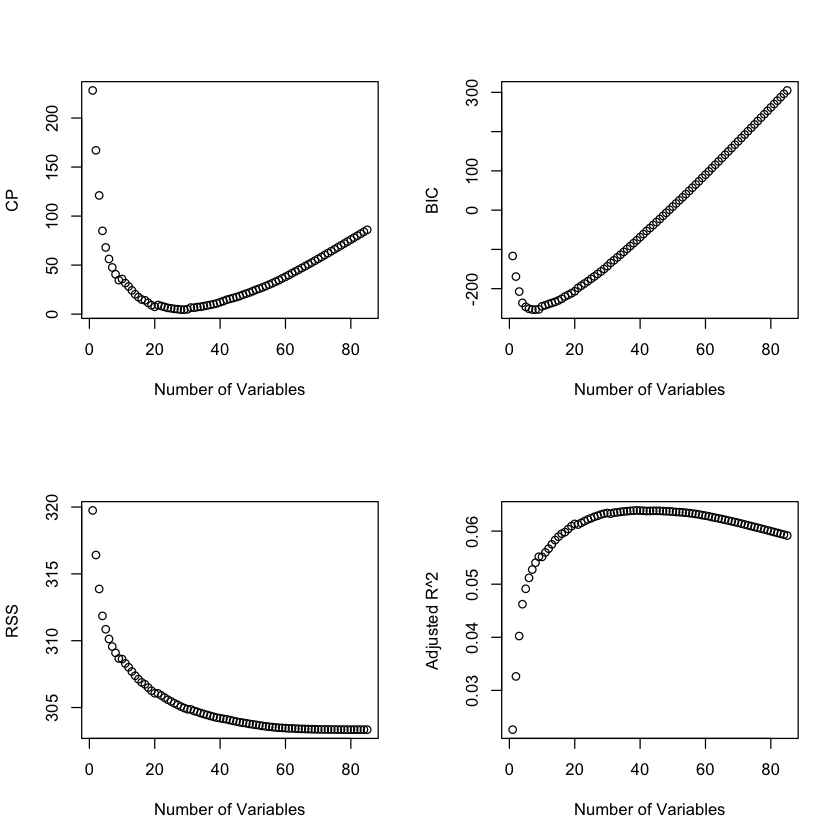

In [57]:
# plotting model selection measures of forward selection

par(mfrow = c(2,2))
plot(backward_summary$cp, xlab = "Number of Variables", ylab = "CP") #Mallows CP
plot(backward_summary$bic, xlab = "Number of Variables", ylab = "BIC") #Bayes Information Criterion
plot(backward_summary$rss, xlab = "Number of Variables", ylab = "RSS") #Residual Sum of Squares
plot(backward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2") #Adjusted R Square

In [58]:
backward_summary$outmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
1 ( 1 ),,,,,,,,,,,⋯,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
8 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,*,,*
10 ( 1 ),,,,,,,,,,*,⋯,*,,,,,,*,*,,*


In [59]:
#best 29 variable subset selected via backward selection using mallows CP

coef(regfit_backward, 29)

(Intercept)           V4           V6          V10          V17          V18 
 0.625880433  0.010557113 -0.004580412  0.004741649 -0.006885236 -0.013157430 
         V21          V22          V28          V30          V35          V36 
-0.007679696  0.003181598  0.003341660 -0.002542231 -0.068207079 -0.070234021 
         V41          V42          V44          V46          V47          V55 
-0.013613211  0.005720362  0.010337243 -0.016213475  0.010334083 -0.016787090 
         V57          V58          V59          V63          V76          V78 
 0.195199280  0.062671391  0.012829656 -0.049058878  0.039448241 -0.411354129 
         V79          V80          V82          V83          V84          V85 
-0.221856163 -0.021289726  0.284396711  0.036396646  0.110993314  0.073078894

In [60]:
predict.regsubsets = function(object, newdata, id)
{
    form  = as.formula(object$call[[2]])
    mat   = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvars = names(coefi)
    mat[, xvars]%*%coefi
}

In [61]:
#To store forward train and test errors

fwd_train_errors <- matrix(rep(NA, 85))
fwd_test_errors  <- matrix(rep(NA, 85))

In [62]:
# calculating training and testing errors of all best p models selected via forward selection

for (i in 1:85) {
    
    y_pred_train = predict(regfit_forward, newdata = training_set, id = i)
    y_pred_test  = predict(regfit_forward, newdata = testing_set, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    fwd_train_errors[i] = mean(y_pred_train != training_set[, 86])
    fwd_test_errors[i]  = mean(y_pred_test  != testing_set[, 86])
}

In [63]:
#To store backward train and test errors

bwd_train_errors <- matrix(rep(NA, 85))
bwd_test_errors  <- matrix(rep(NA, 85))

In [64]:
# calculating training and testing errors of all best p models selected via backward selection

for (i in 1:85) {
    
    y_pred_train = predict(regfit_backward, newdata = training_set, id = i)
    y_pred_test  = predict(regfit_backward, newdata = testing_set, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    bwd_train_errors[i] = mean(y_pred_train != training_set[, 86])
    bwd_test_errors[i]  = mean(y_pred_test  != testing_set[, 86])
}

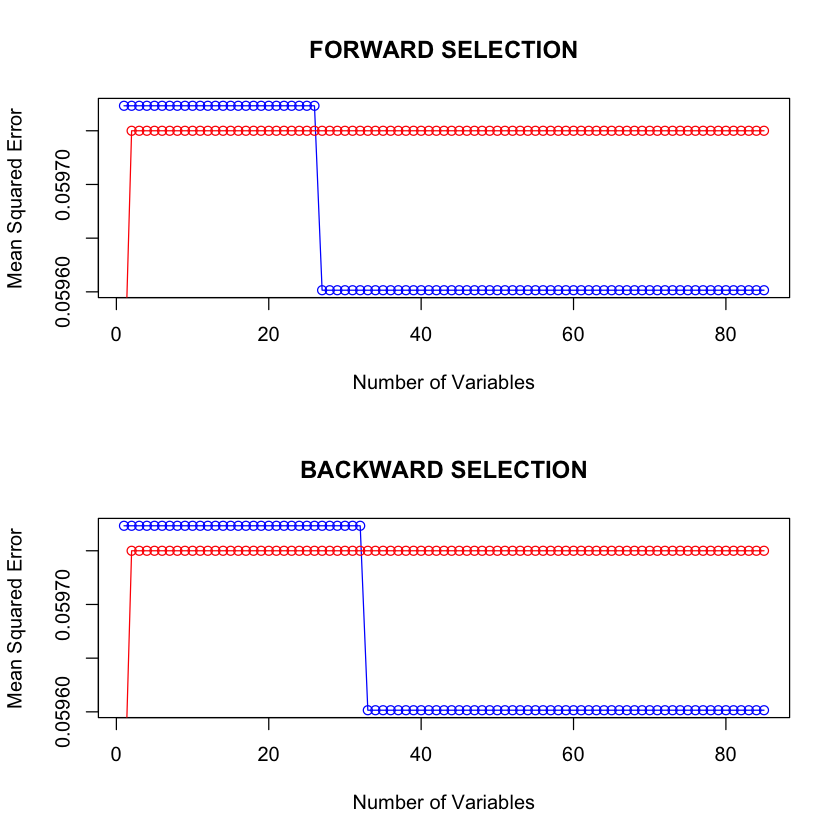

In [65]:
#plotting training and testing errors

par(mfrow = c(2, 1))

plot(fwd_train_errors, col = "blue", type = "o", xlab = "Number of Variables", ylab = "Mean Squared Error",
    main = "FORWARD SELECTION")
lines(fwd_test_errors, col = "red", type = "o")


plot(bwd_train_errors, col = "blue", type = "o", xlab = "Number of Variables", ylab = "Mean Squared Error",
    main = "BACKWARD SELECTION")
lines(bwd_test_errors, col = "red", type = "o")

In [66]:
#Ridge Regression

ridge_fit_insurance = cv.glmnet(as.matrix(x_training_set), y_training_set, alpha = 0)
ridge_fit_insurance


Call:  cv.glmnet(x = as.matrix(x_training_set), y = y_training_set,      alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min   0.15    60 0.05367 0.003046      85
1se  35.78     1 0.05621 0.003381      85

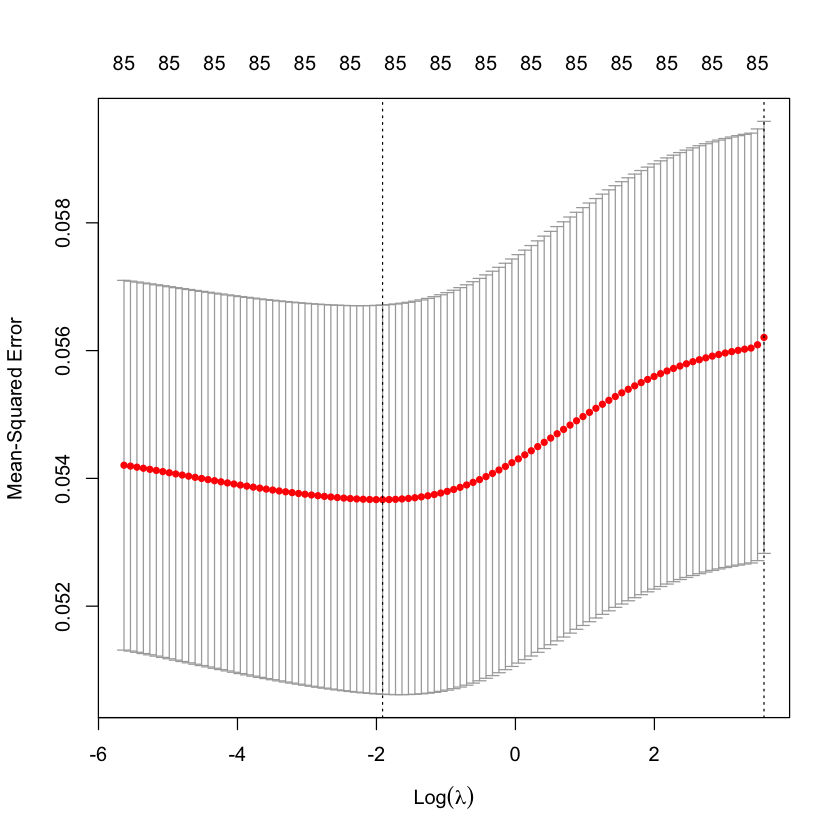

In [67]:
plot(ridge_fit_insurance)

In [68]:
#finding best lambda for ridge regression

best_lambda_ridge = ridge_fit_insurance$lambda.min
best_lambda_ridge

[1] 0.1478253

In [69]:
best_ridge_coeff <- predict(ridge_fit_insurance, s= best_lambda_ridge, type = "coefficients")
best_ridge_coeff

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -2.330643e-02
V1          -4.988480e-05
V2          -4.033178e-03
V3          -5.265207e-04
V4           4.323008e-03
V5          -4.836849e-04
V6          -2.204122e-03
V7           1.255453e-03
V8           1.581336e-03
V9          -1.207521e-03
V10          1.363301e-03
V11         -2.480619e-03
V12         -4.675326e-04
V13         -4.881166e-04
V14         -7.721037e-04
V15          5.282210e-04
V16          3.338055e-03
V17          5.480957e-04
V18         -2.036624e-03
V19          6.235137e-04
V20          3.302072e-04
V21         -4.748236e-03
V22          1.966556e-03
V23         -6.454805e-04
V24          4.515108e-05
V25          6.186308e-04
V26         -1.867119e-04
V27         -4.376085e-04
V28          6.361970e-04
V29         -1.206601e-03
V30         -8.661148e-04
V31          7.749665e-04
V32          1.827659e-03
V33          1.066883e-04
V34         -9.060591e-04
V35          3.398341e

In [70]:
#Predicting training samples using best lambda

train_predict_ridge <- predict(ridge_fit_insurance, s = best_lambda_ridge, newx = as.matrix(x_training_set), type = 'response')
train_predict_ridge <- ifelse(train_predict_ridge > 0.5, 1, 0)

In [71]:
#Predicting testing samples using best lambda

test_predict_ridge <- predict(ridge_fit_insurance, s = best_lambda_ridge, newx = as.matrix(x_testing_set), type = 'response')
test_predict_ridge <- ifelse(test_predict_ridge > 0.5, 1, 0)

In [72]:
table(train_predict_ridge, y_training_set)
table(test_predict_ridge, as.integer(unlist(y_testing_set)))

                   y_training_set
train_predict_ridge    0    1
                  0 5474  347
                  1    0    1

                  
test_predict_ridge    0    1
                 0 3762  238

In [73]:
#Training Error (MAE)

train_error_ridge <- mean(y_training_set != train_predict_ridge )
train_error_ridge

[1] 0.05960151

In [74]:
postResample(y_testing_set, test_predict_ridge)

RMSE  Rsquared       MAE 
0.2439262        NA 0.0595000

In [75]:
postResample(y_training_set, train_predict_ridge)

RMSE    Rsquared         MAE 
0.244134208 0.002702265 0.059601512

In [76]:
#Lasso Regression

In [77]:
lasso_fit_insurance = cv.glmnet(as.matrix(x_training_set), y_training_set, alpha = 1)
lasso_fit_insurance


Call:  cv.glmnet(x = as.matrix(x_training_set), y = y_training_set,      alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.00290    28 0.05364 0.004156      29
1se 0.03578     1 0.05623 0.004503       0

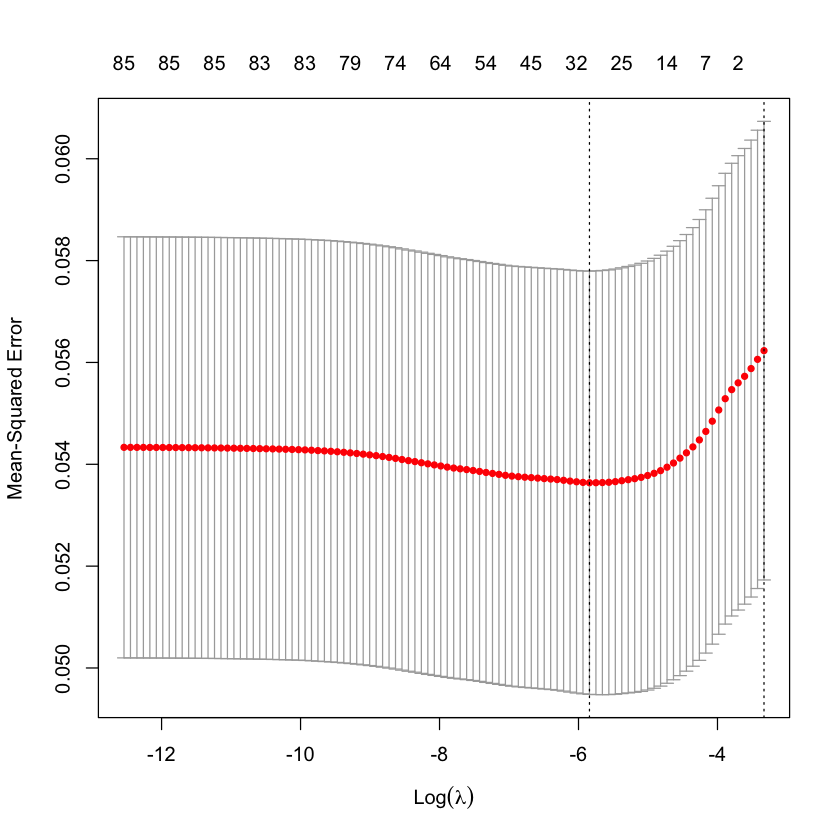

In [78]:
plot(lasso_fit_insurance)

In [79]:
best_lambda_lasso2= lasso_fit_insurance$lambda.min
best_lambda_lasso2

[1] 0.00290187

In [80]:
best_lasso_coeff <- predict(lasso_fit_insurance, s= best_lambda_lasso2, type = "coefficients")
best_lasso_coeff

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -0.0350158855
V1           .           
V2           .           
V3           .           
V4           0.0023659351
V5           .           
V6          -0.0008180668
V7           0.0008997072
V8           .           
V9          -0.0007145860
V10          0.0024045545
V11         -0.0012421555
V12          .           
V13          .           
V14          .           
V15          .           
V16          0.0037814375
V17          .           
V18         -0.0027401015
V19          .           
V20          .           
V21         -0.0055942280
V22          0.0013879332
V23          .           
V24          .           
V25          .           
V26          .           
V27          .           
V28          .           
V29          .           
V30         -0.0012670092
V31          .           
V32          0.0019040943
V33          .           
V34          .           
V35          .        

In [81]:
#predicting training samples

train_predict_lasso <- predict(lasso_fit_insurance, s=best_lambda_lasso2, newx = as.matrix(x_training_set), 
                               type = "response")
train_predict_lasso <- ifelse(train_predict_lasso > 0.5, 1, 0)

In [82]:
table(train_predict_lasso, y_training_set)
training_accuracy <- 5474 / 5820 # number of correct predictions / total predictions 
training_accuracy * 100

                   y_training_set
train_predict_lasso    0    1
                  0 5473  347
                  1    1    1

[1] 94.05498

In [83]:
#predicting testing samples

test_predict_lasso <- predict(lasso_fit_insurance, s=best_lambda_lasso2, newx = as.matrix(x_testing_set), 
                               type = "response")
test_predict_lasso <- ifelse(test_predict_lasso > 0.5, 1, 0)

In [84]:
table(test_predict_lasso, y_testing_set[, 1])
training_accuracy <- 3761 / 4000 # number of correct predictions / total predictions 
training_accuracy * 100

                  
test_predict_lasso    0    1
                 0 3760  237
                 1    2    1

[1] 94.025

In [85]:
# Training Error (MAE)

train_error_lasso <- mean(y_training_set != train_predict_lasso)
train_error_lasso

[1] 0.05977327

In [86]:
# Testing Error (MAE)

test_error_lasso <- mean(y_testing_set != test_predict_lasso)
test_error_lasso

[1] 0.05975

In [87]:
postResample(y_training_set, train_predict_lasso) # training
postResample(y_testing_set, test_predict_lasso) # testing

RMSE    Rsquared         MAE 
0.244485733 0.001185005 0.059773274

RMSE    Rsquared         MAE 
0.244438131 0.001005736 0.059750000

In [88]:
#3
#Reading the train data 
X_train <- read.table(gzfile("zip.train.gz"))
y7or9 <- which(X_train[, 1] == 7 | X_train[, 1] == 9)
X.train <- X_train[y7or9,]
#y.train <- X_train[y7or9, 1]
head(X.train)
dim(X.train)
#head(X.train)
#head(y.train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,⋯,-0.318,1.000,0.536,-0.987,-1,-1,-1,-1,-1,-1
11,7,-1,-1,-1,-1.000,-1.000,-0.596,0.912,1.000,0.290,⋯,-1.000,-0.795,0.663,-0.074,-1,-1,-1,-1,-1,-1
15,7,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,⋯,-1.000,-0.967,0.866,-0.001,-1,-1,-1,-1,-1,-1
16,7,-1,-1,-1,-0.929,0.351,0.798,0.806,0.114,0.015,⋯,0.835,-0.086,-0.991,-1.000,-1,-1,-1,-1,-1,-1
23,7,-1,-1,-1,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,⋯,-0.933,0.667,-0.315,-1.000,-1,-1,-1,-1,-1,-1
26,7,-1,-1,-1,-1.000,-0.846,-0.011,-0.920,-1.000,-1.000,⋯,-1.000,0.008,0.405,-1.000,-1,-1,-1,-1,-1,-1


[1] 1289  257

In [89]:
#Reading in the test data
X_test <- read.table(gzfile("zip.test.gz"))
y7or9 <- which(X_test[, 1] == 7 | X_test[, 1] == 9)
X.test <- X_test[y7or9,]
#y.test <- X_test[y7or9, 1] 
dim(X.test)
#head(y.test)
head(X.test)

[1] 324 257

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,-1,-1.00,-1.000,-1.000,-1.000,-0.948,-0.561,0.148,0.384,⋯,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1,-1,-1,-1
10,9,-1,-1.00,-1.000,-1.000,-1.000,-0.904,-0.060,0.638,0.678,⋯,-0.567,0.642,-0.925,-1.000,-1.000,-1.000,-1,-1,-1,-1
19,9,-1,-1.00,-1.000,-0.916,-0.600,-0.034,0.711,1.000,0.488,⋯,1.000,0.375,-0.982,-1.000,-1.000,-1.000,-1,-1,-1,-1
24,9,-1,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000,-0.441,0.530,⋯,-1.000,-1.000,-1.000,-0.057,0.558,-0.999,-1,-1,-1,-1
31,7,-1,-0.99,0.700,0.283,-0.131,-0.598,-1.000,-1.000,-1.000,⋯,-0.700,0.734,-0.261,-1.000,-1.000,-1.000,-1,-1,-1,-1
35,7,-1,-1.00,-0.862,0.000,0.296,-0.231,0.142,0.384,0.763,⋯,0.703,-0.448,-1.000,-1.000,-1.000,-1.000,-1,-1,-1,-1


In [90]:
#Performing Classification of Linear Regression
L <- lm(V1 ~., data = X.train)
L_predict <- predict(L, X.test)
L.error <-  mean((L_predict - X.test$V1)^2)
L.error

Warning message in predict.lm(L, X.test):
“prediction from a rank-deficient fit may be misleading”


[1] 1.780327e+26

In [91]:
library(class)
k <- c(1, 3, 5, 7, 9, 11, 13, 15)
k.error <- rep(NA, length(k))
for (i in 1:length(k)) {
    knn_predict <- knn(X.train, X.test, X.train$V1, k[i])
    k.error[i] <- mean((knn_predict != X.test$V1))
}
k.error[1]
k.error[2]
k.error[3]
k.error[4]
k.error[5]
k.error[6]
k.error[7]
k.error[8]

[1] 0.01851852

[1] 0.01851852

[1] 0.0154321

[1] 0.01851852

[1] 0.02160494

[1] 0.02777778

[1] 0.0308642

[1] 0.02777778

In [92]:
error <- matrix(c(L.error, k.error), ncol = 1)
colnames(error) <- c("Error Rate")
rownames(error) <- c("Linear Regression", paste("k-NN with k =", k))
error

,Error Rate
Linear Regression,1.780327e+26
k-NN with k = 1,1.851852e-02
k-NN with k = 3,1.851852e-02
k-NN with k = 5,1.543210e-02
k-NN with k = 7,1.851852e-02
k-NN with k = 9,2.160494e-02
k-NN with k = 11,2.777778e-02
k-NN with k = 13,3.086420e-02
k-NN with k = 15,2.777778e-02


The error rate of Linear regression is varying by a lot with knn regression. The knn outperforms Linear regression very well. This signifies that the knn regression is a very good and better method for classification when compared with Linear regression.The training error results are reduced by the fact that there is one direct hit. The amount of error goes up as the number of neighbors is increased.